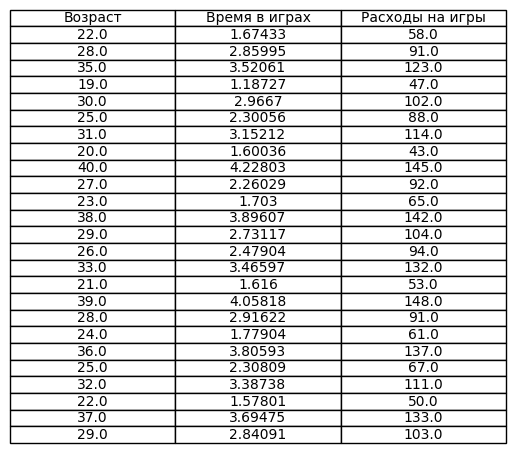

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Пример датасета с 25 пользователями "GameWorld"
data = {
    'Возраст': [22, 28, 35, 19, 30, 25, 31, 20, 40, 27, 23, 38, 29, 26, 33, 21, 39, 28, 24, 36, 25, 32, 22, 37, 29],
    'Время в играх': [1.67433, 2.85995, 3.52061, 1.18727, 2.9667, 2.30056, 3.15212, 1.60036, 4.22803, 2.26029, 1.703, 3.89607, 2.73117, 2.47904, 3.46597, 1.616, 4.05818, 2.91622, 1.77904, 3.80593, 2.30809, 3.38738, 1.57801, 3.69475, 2.84091],
    'Расходы на игры': [58, 91, 123, 47, 102, 88, 114, 43, 145, 92, 65, 142, 104, 94, 132, 53, 148, 91, 61, 137, 67, 111, 50, 133, 103]
}

df = pd.DataFrame(data)

# Шаг 1: Матрица данных X
X = df.values

# --- Визуализация шага 1 ---
# Таблица с данными
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=X, colLabels=df.columns, loc='center', cellLoc='center')
plt.show()

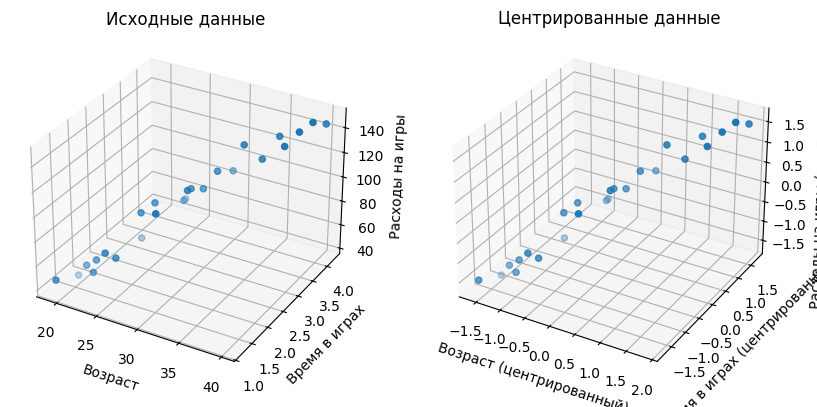

In [2]:
# Шаг 2: Центрирование данных
scaler = StandardScaler()
X_centered = scaler.fit_transform(X)

# --- Визуализация шага 2 ---
# Scatter plot до и после центрирования
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2])
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Время в играх')
ax1.set_zlabel('Расходы на игры')
ax1.set_title('Исходные данные')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2])
ax2.set_xlabel('Возраст (центрированный)')
ax2.set_ylabel('Время в играх (центрированный)')
ax2.set_zlabel('Расходы на игры (центрированный)')
ax2.set_title('Центрированные данные')
plt.show()

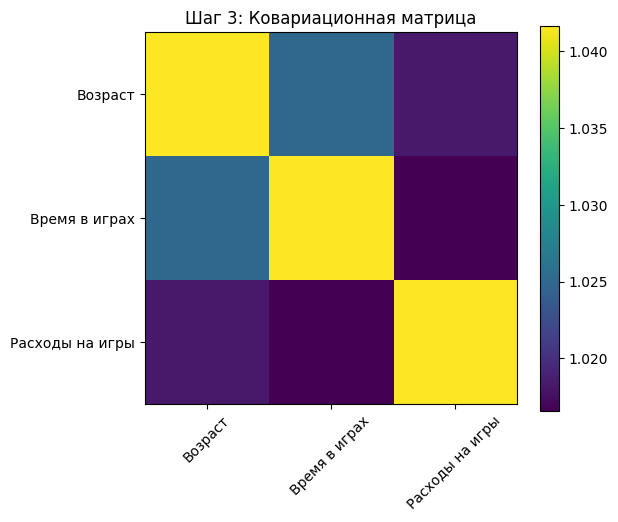

In [3]:
# Шаг 3: Вычисление ковариационной матрицы
cov_matrix = np.cov(X_centered.T)

# --- Визуализация шага 3 ---
# Heatmap ковариационной матрицы
plt.figure(figsize=(6, 5))
plt.imshow(cov_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Шаг 3: Ковариационная матрица')
plt.show()


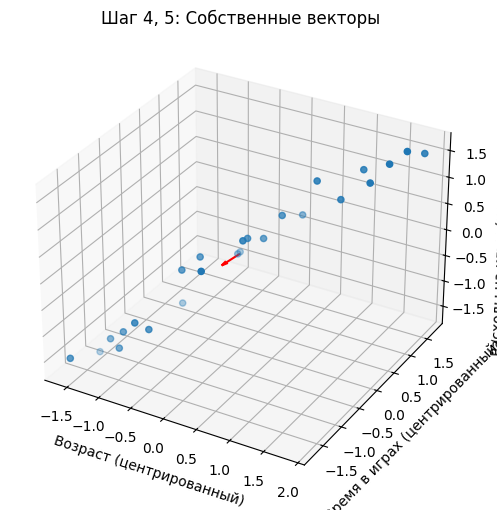

In [4]:
# Шаг 4: Нахождение собственных векторов и собственных значений
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Шаг 5: Сортировка собственных векторов
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# --- Визуализация шага 4 и 5 ---
# Scatter plot с собственными векторами
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2])
ax.set_xlabel('Возраст (центрированный)')
ax.set_ylabel('Время в играх (центрированный)')
ax.set_zlabel('Расходы на игры (центрированный)')


# Отображение собственных векторов
for i in range(len(eigenvectors)):
    ax.quiver(0, 0, 0, eigenvectors[0, i], eigenvectors[1, i], eigenvectors[2, i], length=eigenvalues[i]/10, color='r')
plt.title('Шаг 4, 5: Собственные векторы')
plt.show()

In [19]:
eigenvalues, eigenvectors

(array([3.08159896, 0.02678636, 0.01661467]),
 array([[-0.57798452, -0.33545571, -0.74391086],
        [-0.57765779, -0.4757148 ,  0.66333016],
        [-0.57640729,  0.81312047,  0.08117718]]))

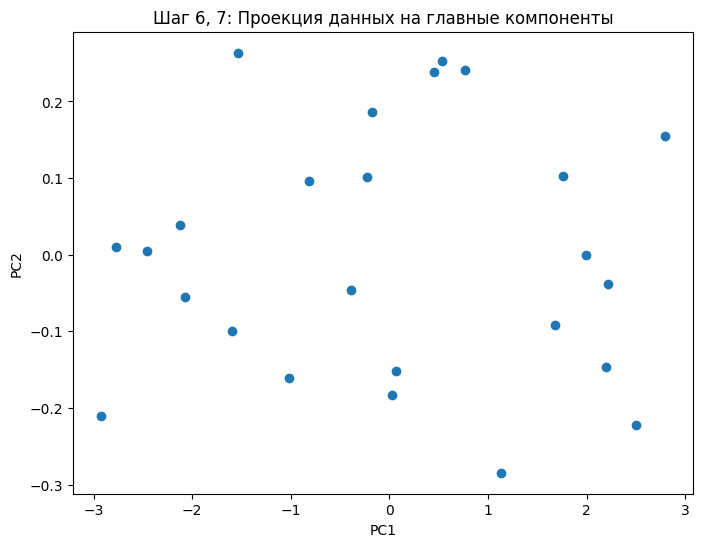


Доля объясненной дисперсии каждой главной компонентой:
 [0.98611167 0.00857164 0.0053167 ]

Кумулятивная доля объясненной дисперсии:
 [0.98611167 0.9946833  1.        ]


In [5]:
# Шаг 6: Выбор главных компонент (k = 2)
k = 2
W = eigenvectors[:, :k]

# Шаг 7: Проекция данных
X_projected = X_centered.dot(W)

# --- Визуализация шага 6 и 7 ---
# Scatter plot проецированных данных
plt.figure(figsize=(8, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Шаг 6, 7: Проекция данных на главные компоненты')
plt.show()

# Дополнительно: объяснение доли объясненной дисперсии
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nДоля объясненной дисперсии каждой главной компонентой:\n", explained_variance_ratio)
print("\nКумулятивная доля объясненной дисперсии:\n", np.cumsum(explained_variance_ratio))

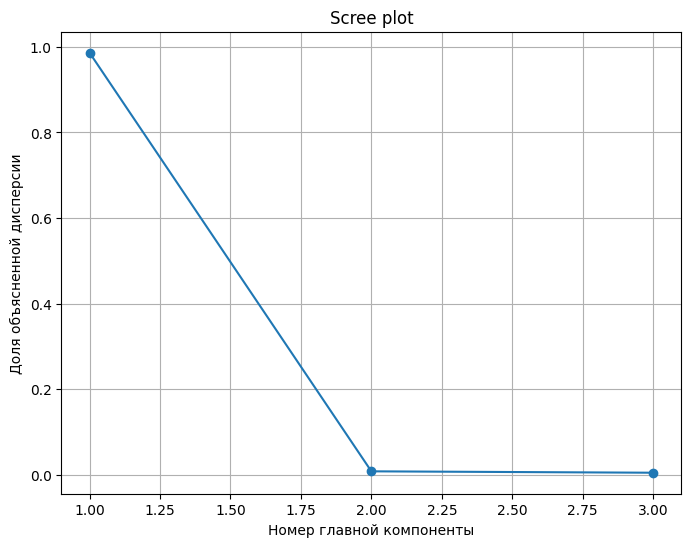

In [6]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Строим scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree plot')
plt.xlabel('Номер главной компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.grid(True)
plt.show()

In [7]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

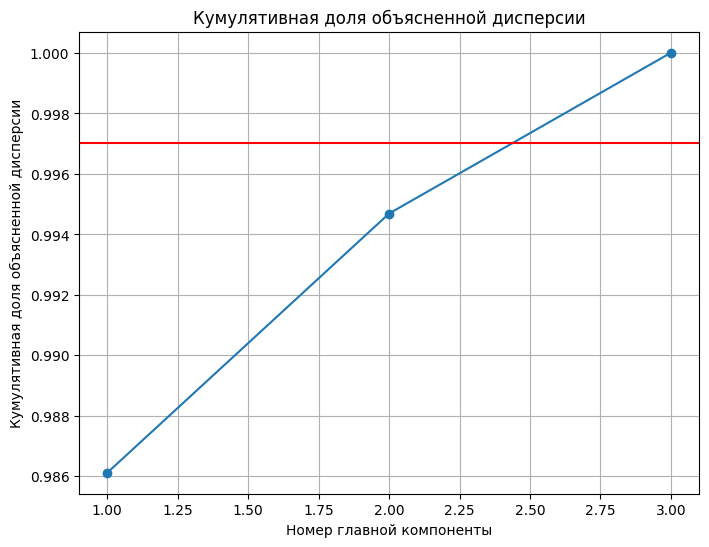

In [8]:
# Строим график кумулятивной объясненной дисперсии
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Кумулятивная доля объясненной дисперсии')
plt.xlabel('Номер главной компоненты')
plt.ylabel('Кумулятивная доля объясненной дисперсии')
plt.grid(True)

# Добавляем горизонтальную линию на уровне 90%
plt.axhline(y=0.997, color='r', linestyle='-')

# Отображаем график
plt.show()

In [20]:
import pandas as pd

# Создаем DataFrame с главными компонентами
pca_components = pd.DataFrame(
    W,
    columns=["PC1", "PC2"],
    index=["Возраст", "Время в играх", "Расходы на игры"],
)

# Выводим DataFrame
print(pca_components.to_markdown(numalign="left", stralign="left"))

|                 | PC1       | PC2       |
|:----------------|:----------|:----------|
| Возраст         | -0.577985 | -0.335456 |
| Время в играх   | -0.577658 | -0.475715 |
| Расходы на игры | -0.576407 | 0.81312   |


PC1:

- Все три признака имеют примерно одинаковый вес (около -0.577) с отрицательным знаком.
Это означает, что PC1 представляет собой "общую активность" пользователя, объединяющую возраст, время в играх и расходы.
Высокие положительные значения PC1 будут соответствовать пользователям с низкими значениями по всем трем признакам (молодые, мало играют, мало тратят).
Высокие отрицательные значения PC1 будут соответствовать пользователям с высокими значениями по всем трем признакам (старше, много играют, много тратят).


PC2:

- Наибольший вес имеет признак "Расходы на игры" (0.81312047) с положительным знаком.
Значимые отрицательные веса имеют "Возраст" (-0.33545571) и "Время в играх" (-0.4757148).
PC2 можно интерпретировать как "баланс между расходами и активностью".
Высокие положительные значения PC2 будут соответствовать пользователям, которые тратят много, но при этом относительно молоды и/или проводят не так много времени в играх. Возможно, это те, кто предпочитает покупать дорогие игры или внутриигровые предметы, но не всегда активно играет.
Высокие отрицательные значения PC2 будут соответствовать пользователям, которые тратят мало, но при этом старше и/или проводят много времени в играх. Возможно, это те, кто предпочитает бесплатные игры или не тратит много денег на игры, но при этом проводит много времени на платформе.


В данном случае PCA выявил две главные компоненты, которые описывают:

- PC1: общую активность пользователя на платформе
- PC2: баланс между расходами на игры и другими показателями активности (возраст, время в играх)

Эти новые признаки могут быть полезны для сегментации пользователей и разработки персонализированных предложений. Например, "GameWorld" может предложить разные типы подписок или рекламных акций для пользователей с разными значениями PC1 и PC2.


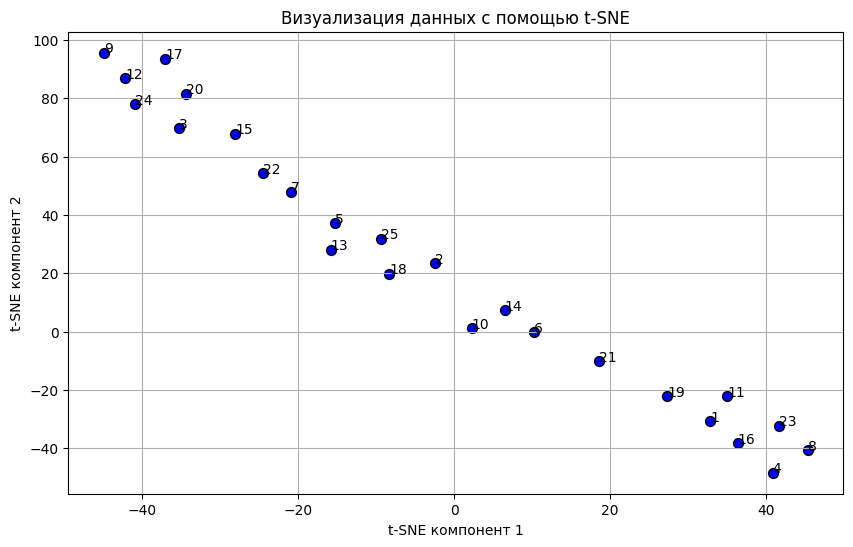

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Датасет с пользователями "GameWorld"
data = {
    'Возраст': [22, 28, 35, 19, 30, 25, 31, 20, 40, 27, 23, 38, 29, 26, 33, 21, 39, 28, 24, 36, 25, 32, 22, 37, 29],
    'Время в играх': [1.67433, 2.85995, 3.52061, 1.18727, 2.9667, 2.30056, 3.15212, 1.60036, 4.22803, 2.26029, 1.703, 3.89607, 2.73117, 2.47904, 3.46597, 1.616, 4.05818, 2.91622, 1.77904, 3.80593, 2.30809, 3.38738, 1.57801, 3.69475, 2.84091],
    'Расходы на игры': [58, 91, 123, 47, 102, 88, 114, 43, 145, 92, 65, 142, 104, 94, 132, 53, 148, 91, 61, 137, 67, 111, 50, 133, 103]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Шаг 1: Матрица данных X
X = df.values

# Шаг 2: Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Шаг 3: Применение t-SNE для уменьшения размерности до 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Шаг 4: Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue', marker='o', edgecolor='k', s=50)

# Добавляем подписи к точкам
for i, txt in enumerate(range(1, len(df) + 1)):
    plt.annotate(txt, (X_tsne[i, 0], X_tsne[i, 1]))

plt.title('Визуализация данных с помощью t-SNE')
plt.xlabel('t-SNE компонент 1')
plt.ylabel('t-SNE компонент 2')
plt.grid(True)
plt.show()


In [18]:
X_tsne

array([[ 3.2837570e+01, -3.0589352e+01],
       [-2.5000620e+00,  2.3531925e+01],
       [-3.5333302e+01,  6.9699104e+01],
       [ 4.0890362e+01, -4.8350384e+01],
       [-1.5343531e+01,  3.7209568e+01],
       [ 1.0251791e+01, -9.2350602e-02],
       [-2.0917385e+01,  4.8016357e+01],
       [ 4.5437626e+01, -4.0717876e+01],
       [-4.4984219e+01,  9.5641350e+01],
       [ 2.2594583e+00,  1.2352518e+00],
       [ 3.5079826e+01, -2.2147963e+01],
       [-4.2242058e+01,  8.6849304e+01],
       [-1.5812585e+01,  2.8070826e+01],
       [ 6.4843864e+00,  7.4476376e+00],
       [-2.8074711e+01,  6.7889481e+01],
       [ 3.6416054e+01, -3.8146782e+01],
       [-3.7066013e+01,  9.3653404e+01],
       [-8.3640785e+00,  1.9919310e+01],
       [ 2.7345125e+01, -2.2095722e+01],
       [-3.4360371e+01,  8.1645790e+01],
       [ 1.8610813e+01, -1.0195002e+01],
       [-2.4481861e+01,  5.4353943e+01],
       [ 4.1704666e+01, -3.2184402e+01],
       [-4.0959866e+01,  7.7999443e+01],
       [-9.40072

Результаты t-SNE представляют собой набор координат точек в 2D-пространстве. Каждая строка в массиве соответствует одному пользователю из исходного датасета, но теперь вместо исходных признаков (возраст, время в играх, расходы на игры) у нас есть две координаты: t-SNE компонент 1 и t-SNE компонент 2.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs

# Используем бэкенд TkAgg
matplotlib.use('TkAgg')

# Генерация данных
np.random.seed(42)
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

# Параметры K-Means
k = 4  # Количество кластеров
max_iterations = 10

# Инициализация центроидов
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Функция для обновления кластеров
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Функция для пересчета центроидов
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# Анимация
fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'y']
scatter = ax.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6, s=50)
centroids_scatter = ax.scatter(centroids[:, 0], centroids[:, 1], c=colors[:k], marker='x', s=100)

def update(frame):
    global centroids
    labels = assign_clusters(X, centroids)
    scatter.set_color([colors[label] for label in labels])
    new_centroids = update_centroids(X, labels, k)
    centroids_scatter.set_offsets(new_centroids)
    centroids = new_centroids
    return scatter, centroids_scatter

# Присваиваем анимацию переменной
ani = FuncAnimation(fig, update, frames=max_iterations, interval=1000, repeat=False)

# Сохраняем анимацию в файл
ani.save('kmeans_animation.mp4', writer='ffmpeg')

plt.title("K-Means Clustering Animation")
plt.show()


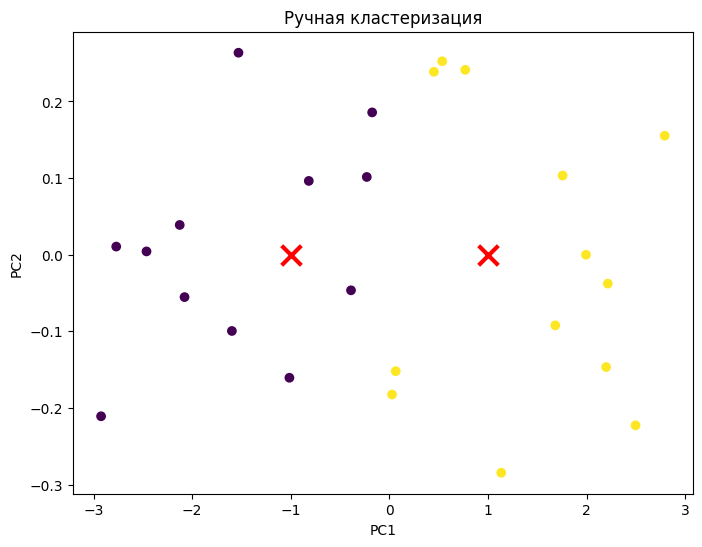


Кластер 1:
|       | Возраст   | Время в играх   | Расходы на игры   | Кластер   |
|:------|:----------|:----------------|:------------------|:----------|
| count | 12        | 12              | 12                | 12        |
| mean  | 34.0833   | 3.47898         | 124.5             | 0         |
| std   | 3.94181   | 0.483348        | 17.1809           | 0         |
| min   | 29        | 2.73117         | 102               | 0         |
| 25%   | 30.75     | 3.10576         | 109.25            | 0         |
| 50%   | 34        | 3.49329         | 127.5             | 0         |
| 75%   | 37.25     | 3.82847         | 138.25            | 0         |
| max   | 40        | 4.22803         | 148               | 0         |

Кластер 2:
|       | Возраст   | Время в играх   | Расходы на игры   | Кластер   |
|:------|:----------|:----------------|:------------------|:----------|
| count | 13        | 13              | 13                | 13        |
| mean  | 23.8462   | 2.02017         | 

In [11]:
centroids = np.array([[-1, 0], [1, 0]])  # Примерные координаты центроидов

# Распределяем объекты по кластерам
labels = np.zeros(len(X_projected), dtype=int)
for i, point in enumerate(X_projected):
    distances = np.linalg.norm(point - centroids, axis=1)  # Евклидово расстояние
    labels[i] = np.argmin(distances)  # Присваиваем метку ближайшего центроида

# Визуализируем кластеры
plt.figure(figsize=(8, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')  # Отображаем центроиды
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ручная кластеризация')
plt.show()

# Интерпретация результатов
df['Кластер'] = labels
for i in range(len(centroids)):
    print(f"\nКластер {i+1}:")
    print(df[df['Кластер'] == i].describe().to_markdown(numalign="left", stralign="left"))

In [12]:
from sklearn.cluster import KMeans

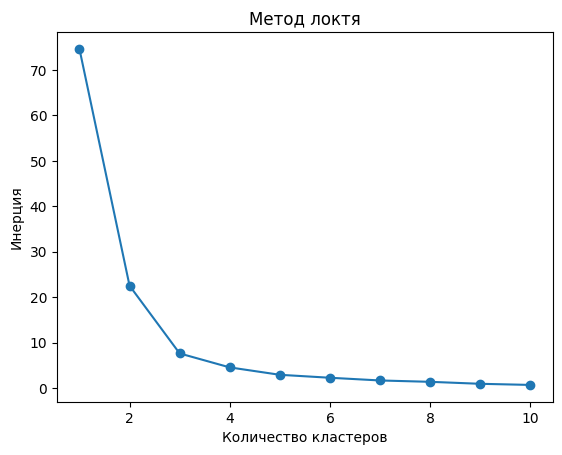

In [13]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_projected)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

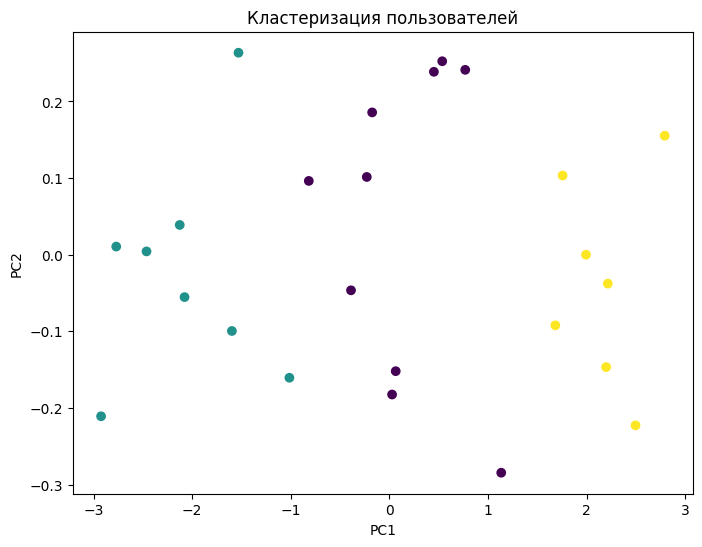


Кластер 1:
|       | Возраст   | Время в играх   | Расходы на игры   | Кластер   |
|:------|:----------|:----------------|:------------------|:----------|
| count | 10        | 10              | 10                | 10        |
| mean  | 27.8      | 2.68151         | 94.6              | 0         |
| std   | 2.04396   | 0.319826        | 12.5981           | 0         |
| min   | 25        | 2.26029         | 67                | 0         |
| 25%   | 26.25     | 2.35083         | 91                | 0         |
| 50%   | 28        | 2.78604         | 93                | 0         |
| 75%   | 29        | 2.90215         | 102.75            | 0         |
| max   | 31        | 3.15212         | 114               | 0         |

Кластер 2:
|       | Возраст   | Время в играх   | Расходы на игры   | Кластер   |
|:------|:----------|:----------------|:------------------|:----------|
| count | 8         | 8               | 8                 | 8         |
| mean  | 36.25     | 3.75711         | 

In [21]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_projected)

# Получаем метки кластеров для каждого пользователя
labels = kmeans.labels_

# --- Визуализация кластеров ---
plt.figure(figsize=(8, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Кластеризация пользователей')
plt.show()

# Добавляем информацию о кластерах в исходный датафрейм
df['Кластер'] = labels

# Выводим информацию о каждом кластере
for i in range(n_clusters):
    print(f"\nКластер {i+1}:")
    print(df[df['Кластер'] == i].describe().to_markdown(numalign="left", stralign="left"))

In [15]:
from sklearn.cluster import DBSCAN

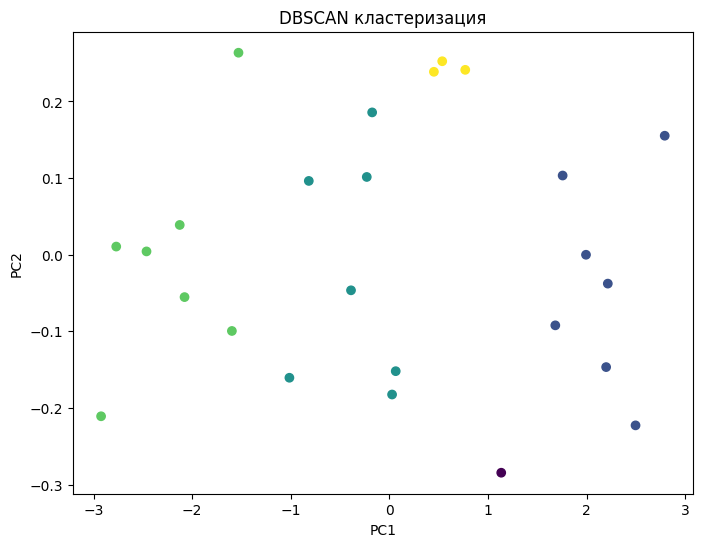


Кластер 1:
|       | Возраст   | Время в играх   | Расходы на игры   | Кластер   |
|:------|:----------|:----------------|:------------------|:----------|
| count | 7         | 7               | 7                 | 7         |
| mean  | 21.5714   | 1.59114         | 53.8571           | 0         |
| std   | 1.71825   | 0.19093         | 7.88307           | 0         |
| min   | 19        | 1.18727         | 43                | 0         |
| 25%   | 20.5      | 1.58919         | 48.5              | 0         |
| 50%   | 22        | 1.616           | 53                | 0         |
| 75%   | 22.5      | 1.68867         | 59.5              | 0         |
| max   | 24        | 1.77904         | 65                | 0         |

Кластер 2:
|       | Возраст   | Время в играх   | Расходы на игры   | Кластер   |
|:------|:----------|:----------------|:------------------|:----------|
| count | 7         | 7               | 7                 | 7         |
| mean  | 29.5714   | 2.97921         | 

In [16]:
eps = 0.5  # Максимальное расстояние между точками в кластере
min_samples = 3  # Минимальное количество точек для образования кластера

# Создаем экземпляр DBSCAN и обучаем модель
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_projected)

# --- Визуализация кластеров ---
plt.figure(figsize=(8, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN кластеризация')
plt.show()

# Добавляем информацию о кластерах в исходный датафрейм
df['Кластер'] = labels

# Выводим информацию о каждом кластере
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Количество кластеров, исключая шум
for i in range(n_clusters):
    print(f"\nКластер {i+1}:")
    print(df[df['Кластер'] == i].describe().to_markdown(numalign="left", stralign="left"))

# Выводим информацию о шумовых объектах
if -1 in labels:
    print("\nШумовые объекты:")
    print(df[df['Кластер'] == -1].describe().to_markdown(numalign="left", stralign="left"))